In [325]:
from librerias import *
import calendar

In [326]:
btc_dia = pd.read_csv ('Data/btc_dia.csv')

btc_dia.set_index('Date', inplace=True)

btc_dia.index = pd.to_datetime(btc_dia.index)

btc_box = btc_dia.copy ()

# Cambiamos esta linea para hacer graficos de diferentes temporalidades

btc_dia = btc_dia.loc['2014-01-01':]

btc_dia = pd.DataFrame (btc_dia ['Price'])



In [327]:
# Crear listas vacías para los días de la semana
lunes = []
martes = []
miercoles = []
jueves = []
viernes = []
sabado = []
domingo = []


In [328]:
def get_dsr (day,dsr):
    if day == 'Monday':
        lunes.append (float (dsr))
    elif day == 'Tuesday':
        martes.append (float (dsr))
    elif day == 'Wednesday':
        miercoles.append (float (dsr))
    elif day == 'Thursday':
        jueves.append (float (dsr))
    elif day == 'Friday':
        viernes.append (float (dsr))
    elif day == 'Saturday':
        sabado.append (float (dsr))
    elif day == 'Sunday':
        domingo.append (float (dsr))
    else:
        print ("algo salio mal")


In [329]:
# calculando y mostrando daily simple return

btc_dia = btc_dia.sort_index()

dsr = btc_dia ['Price'].pct_change (1)

btc_dia ['DRS'] = dsr

btc_dia = btc_dia [1:]

btc_dia

,Price,DRS
Date,,
2014-01-02,856,0.050307
2014-01-03,884,0.032710
2014-01-04,924,0.045249
2014-01-05,1014,0.097403
2014-01-06,1012,-0.001972
...,...,...
2024-03-14,71387,-0.022979
2024-03-15,69463,-0.026952
2024-03-16,65314,-0.059730


In [330]:
for i in range (0, len (btc_dia)):
    btc_dia_dsr = btc_dia ['DRS'][i]
    curr_date = btc_dia.index [i]
    btc_dia_name = calendar.day_name [curr_date.weekday ()]

# añadir los simple return al dia correspondiente

    get_dsr (btc_dia_name, btc_dia_dsr  )

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\1514717308.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [331]:
def AVG (day):
    if not day:
        return [0]
    else:
        return [sum(day)/len (day)]

In [332]:
# crear un df y poner el index a los dias de la semana

df_returns = pd.DataFrame (index = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo'])

df_returns ['AVG'] = AVG (lunes) + AVG (martes) + AVG (miercoles) + AVG (jueves) + AVG (viernes) + AVG (sabado) + AVG (domingo)

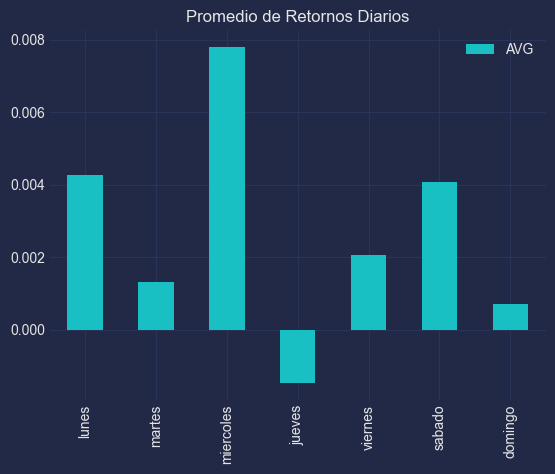

In [333]:
# Graficar los retornos como un gráfico de barras
df_returns.plot.bar()
plt.title('Promedio de Retornos Diarios')
fig = plt.gcf()
plt.show()


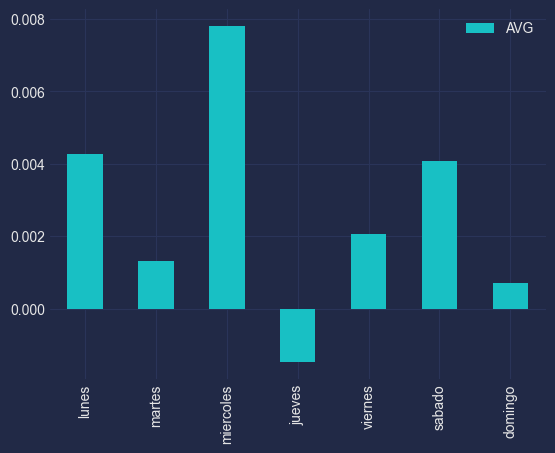

In [334]:
df_returns.plot.bar ()
fig = plt.gcf()

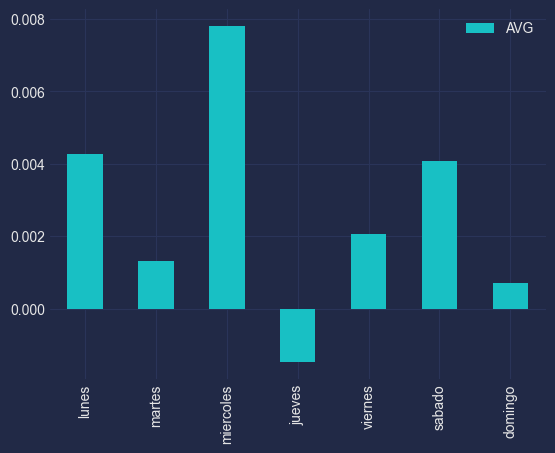

In [335]:
import matplotlib.pyplot as plt

# Graficar los retornos como un gráfico de barras
df_returns.plot.bar()

# Obtener la figura actual
fig = plt.gcf()

# Cambiar el color de fondo de la figura
#fig.set_facecolor('lightgrey')

# Mostrar el gráfico
plt.show()


In [336]:
df_returns

,AVG
lunes,0.004274
martes,0.001302
miercoles,0.007801
jueves,-0.001476
viernes,0.002058
sabado,0.004074
domingo,0.000713


In [349]:
import pandas as pd

# Lista para almacenar los nombres de las variables creadas
nombres_variables = []

# Lista para almacenar los DataFrames creados
dataframes = []

# Utiliza pd.Grouper para agrupar por año y seleccionar una columna específica
grouped = btc_dia.groupby(pd.Grouper(freq='YE'))['DRS']

# Itera sobre los grupos y crea variables con el nombre correspondiente a cada año
for year, group in grouped:
    # Crea una variable con el nombre del año y asigna el grupo correspondiente
    nombre_variable = f'df_{year.year}'

    globals()[nombre_variable] = group

    nombres_variables.append(nombre_variable)
    # Convierte el grupo en un DataFrame y añádelo a la lista de DataFrames
    df_temporal = pd.DataFrame(group)

    df_temporal.columns = ['DRS']  # Cambia el nombre de la columna si es necesario
    
    dataframes.append(df_temporal)
    
# Muestra los nombres de las variables creadas
print("Variables creadas:")
print(nombres_variables)

# Muestra los primeros registros de cada DataFrame creado
for df in dataframes:
    print(df)


Variables creadas:
['df_2014', 'df_2015', 'df_2016', 'df_2017', 'df_2018', 'df_2019', 'df_2020', 'df_2021', 'df_2022', 'df_2023', 'df_2024']
                 DRS
Date                
2014-01-02  0.050307
2014-01-03  0.032710
2014-01-04  0.045249
2014-01-05  0.097403
2014-01-06 -0.001972
...              ...
2014-12-27 -0.045455
2014-12-28  0.003175
2014-12-29 -0.006329
2014-12-30 -0.009554
2014-12-31  0.022508

[364 rows x 1 columns]
                 DRS
Date                
2015-01-01 -0.012579
2015-01-02  0.003185
2015-01-03 -0.088889
2015-01-04 -0.080139
2015-01-05  0.037879
...              ...
2015-12-27  0.016867
2015-12-28 -0.002370
2015-12-29  0.023753
2015-12-30 -0.009281
2015-12-31  0.007026

[365 rows x 1 columns]
                 DRS
Date                
2016-01-01  0.009302
2016-01-02 -0.002304
2016-01-03 -0.006928
2016-01-04  0.006977
2016-01-05 -0.004619
...              ...
2016-12-27  0.030067
2016-12-28  0.050811
2016-12-29 -0.001029
2016-12-30 -0.012358
2016-12-31  0

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



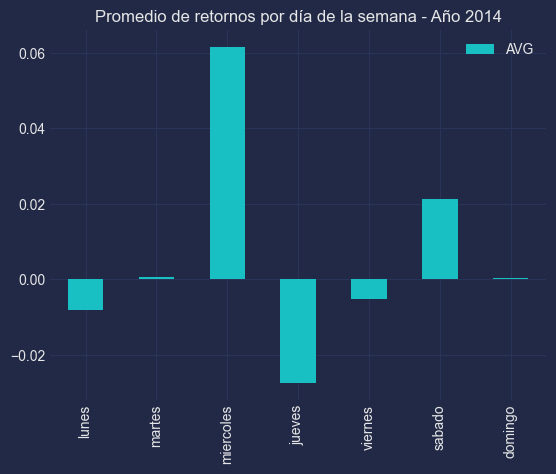

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



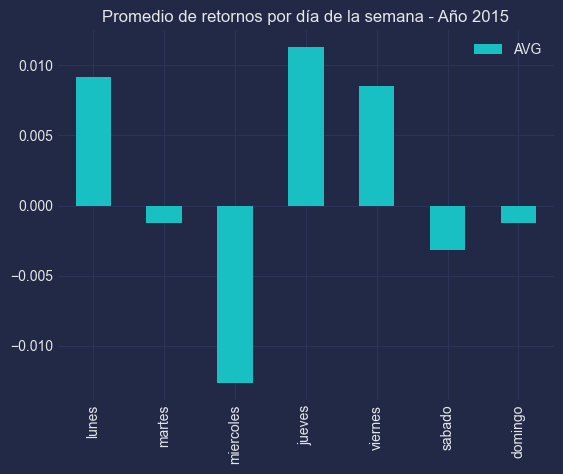

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



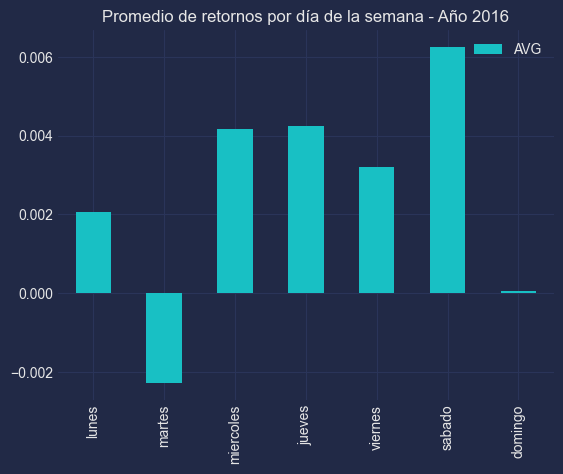

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



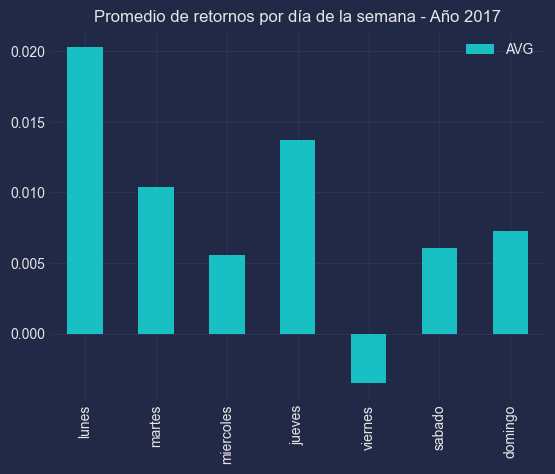

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



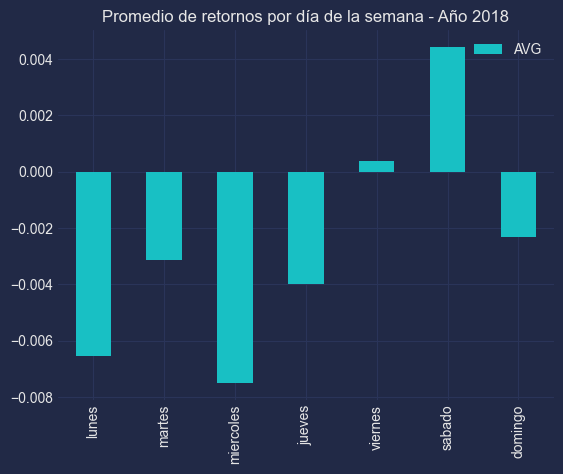

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



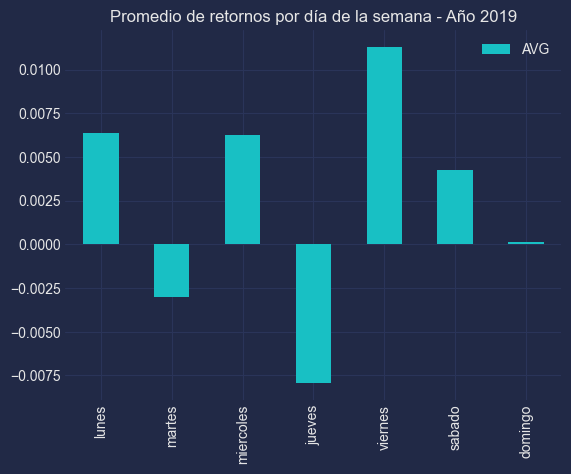

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



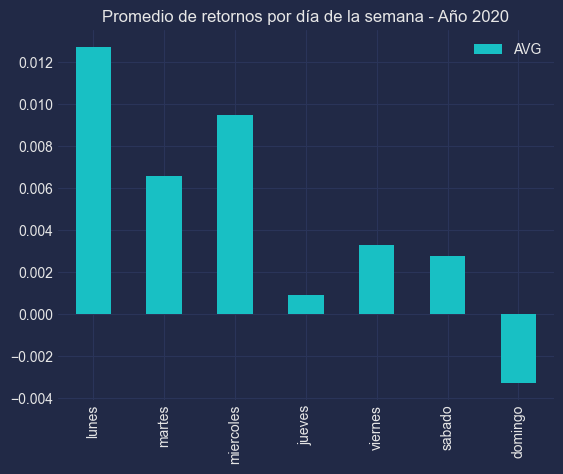

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



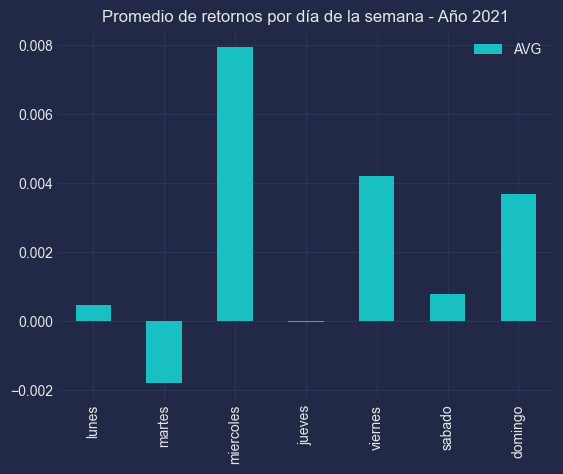

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



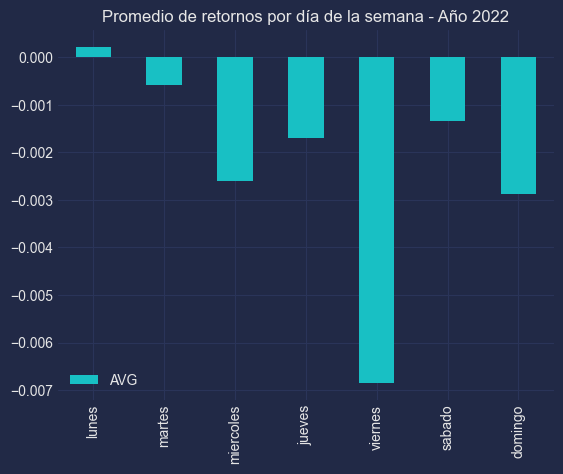

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



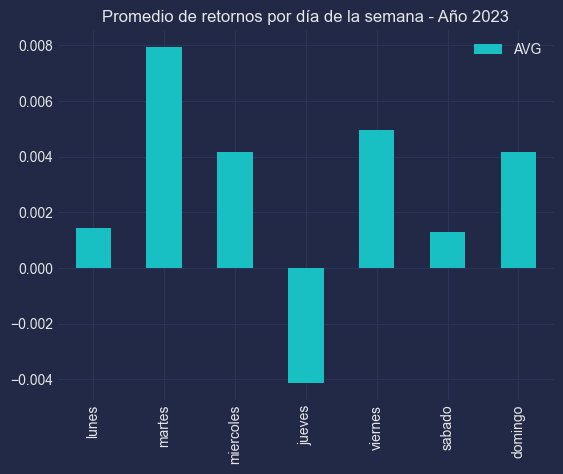

C:\Users\pobla\AppData\Local\Temp\ipykernel_18780\2385195315.py:19: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



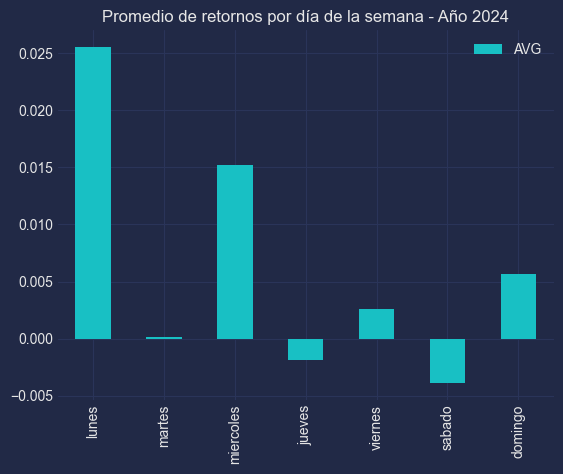

In [338]:
def get_dsr_and_plot(df):
    # Lista para almacenar los retornos diarios por día de la semana
    dias_de_la_semana = {
        'Monday': [],
        'Tuesday': [],
        'Wednesday': [],
        'Thursday': [],
        'Friday': [],
        'Saturday': [],
        'Sunday': []
    }

    # Función para añadir los retornos al día correspondiente
    def get_dsr(day, dsr):
        dias_de_la_semana[day].append(float(dsr))

    # Iterar sobre los datos del DataFrame
    for i in range(len(df)):
        btc_dia_dsr = df['DRS'][i]
        curr_date = df.index[i]
        btc_dia_name = calendar.day_name[curr_date.weekday()]
        # Añadir los retornos al día correspondiente
        get_dsr(btc_dia_name, btc_dia_dsr)

    # Función para calcular el promedio de los retornos por día de la semana
    def avg(day):
        if not day:
            return [0]
        else:
            return [sum(day) / len(day)]

    # Calcular los promedios y crear el DataFrame
    df_returns = pd.DataFrame(index=['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo'])
    df_returns['AVG'] = avg(dias_de_la_semana['Monday']) + avg(dias_de_la_semana['Tuesday']) + avg(
        dias_de_la_semana['Wednesday']) + avg(dias_de_la_semana['Thursday']) + avg(dias_de_la_semana['Friday']) + avg(
        dias_de_la_semana['Saturday']) + avg(dias_de_la_semana['Sunday'])

    # Obtener el año del DataFrame
    year = df.index.year[0]

    # Graficar los promedios
    df_returns.plot.bar()
    
    # Configurar el título del gráfico con el año
    plt.title(f'Promedio de retornos por día de la semana - Año {year}')
    plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
    # Mostrar el gráfico
    plt.show()

# Llamada a la función con tu DataFrame df
for df in dataframes [-11:]:
    get_dsr_and_plot(df)


In [339]:
btc_box ['retornos'] = btc_box ['Price'].pct_change ().round (2)
btc_box

,Price,Open,High,Low,Vol_BTC,Vol_USD,retornos
Date,,,,,,,
2024-03-18,67594,68389,68920,66601,78070.0,"5,277,063,580",NaN
2024-03-17,68391,65314,68857,64605,66070.0,"4,518,593,370",0.01
2024-03-16,65314,69456,70037,64971,75820.0,"4,952,107,480",-0.04
2024-03-15,69463,71387,72398,65765,148590.0,"10,321,507,170",0.06
2024-03-14,71387,73066,73740,68717,109430.0,"7,811,879,410",0.03
...,...,...,...,...,...,...,...
2011-06-07,23,18,24,18,53720.0,"1,235,560",-0.21
2011-06-06,18,16,19,16,55090.0,"991,620",-0.22
2011-06-05,16,18,19,16,24280.0,"388,480",-0.11


In [340]:
btc_box.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4274 entries, 2024-03-18 to 2011-06-03
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     4274 non-null   int64  
 1   Open      4274 non-null   int64  
 2   High      4274 non-null   int64  
 3   Low       4274 non-null   int64  
 4   Vol_BTC   4268 non-null   float64
 5   Vol_USD   4268 non-null   object 
 6   retornos  4273 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 267.1+ KB


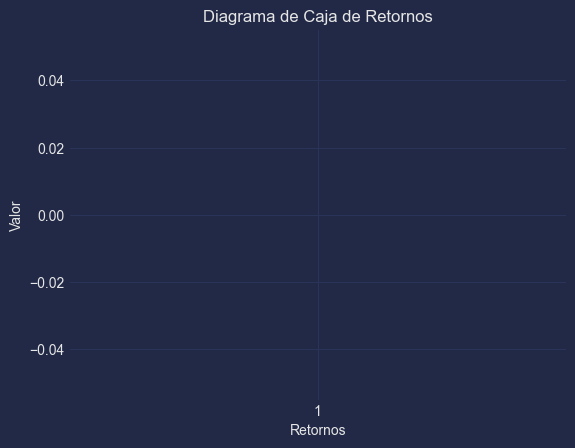

In [341]:

# Crear el boxplot
plt.boxplot(btc_box['retornos'])

# Configurar etiquetas y título
plt.xlabel('Retornos')
plt.ylabel('Valor')
plt.title('Diagrama de Caja de Retornos')

# Mostrar el boxplot
plt.show()


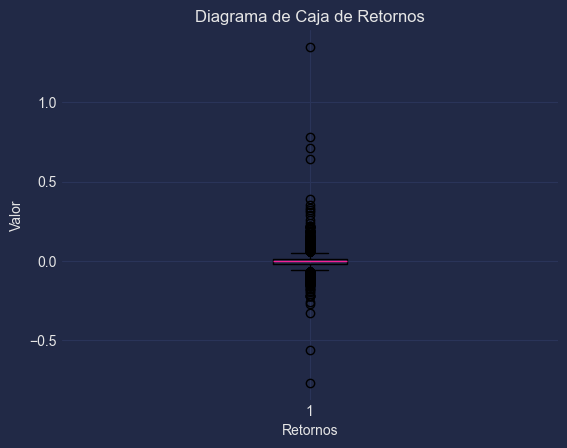

In [342]:
import matplotlib.pyplot as plt

# Eliminar filas con valores nulos en la columna 'retornos'
btc_box_clean = btc_box.dropna(subset=['retornos'])

# Crear el boxplot
plt.boxplot(btc_box_clean['retornos'])

# Configurar etiquetas y título
plt.xlabel('Retornos')
plt.ylabel('Valor')
plt.title('Diagrama de Caja de Retornos')

# Mostrar el boxplot
plt.show()


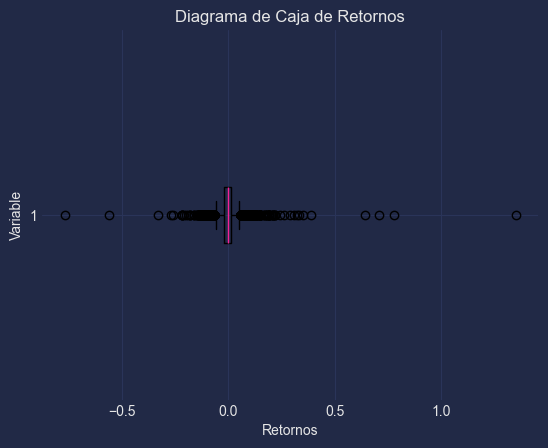

In [343]:
import matplotlib.pyplot as plt

# Eliminar filas con valores nulos en la columna 'retornos'
btc_box_clean = btc_box.dropna(subset=['retornos'])

# Crear el boxplot en horizontal
plt.boxplot(btc_box_clean['retornos'], vert=False)

# Configurar etiquetas y título
plt.xlabel('Retornos')
plt.ylabel('Variable')
plt.title('Diagrama de Caja de Retornos')

# Mostrar el boxplot
plt.show()


In [344]:
btc_box = btc_box.loc['2014-01-01':]

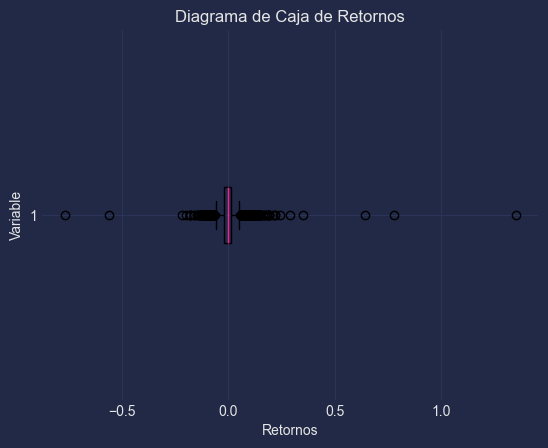

In [345]:
import matplotlib.pyplot as plt

# Eliminar filas con valores nulos en la columna 'retornos'
btc_box_clean = btc_box.dropna(subset=['retornos'])

# Crear el boxplot en horizontal
plt.boxplot(btc_box_clean['retornos'], vert=False)

# Configurar etiquetas y título
plt.xlabel('Retornos')
plt.ylabel('Variable')
plt.title('Diagrama de Caja de Retornos')

# Mostrar el boxplot
plt.show()

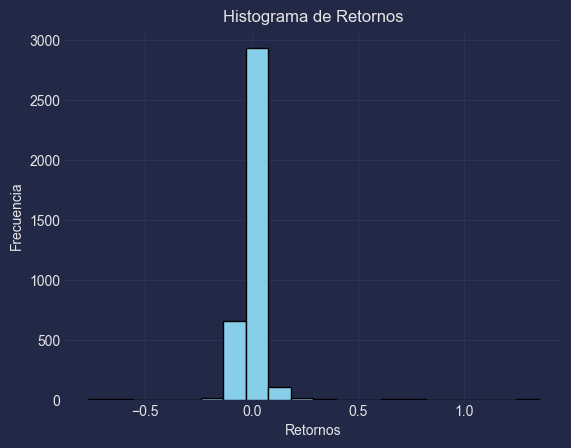

In [346]:
import matplotlib.pyplot as plt

# Eliminar filas con valores nulos en la columna 'retornos'
btc_box_clean = btc_box.dropna(subset=['retornos'])

# Crear el histograma
plt.hist(btc_box_clean['retornos'], bins=20, color='skyblue', edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Retornos')

# Mostrar el histograma
plt.show()


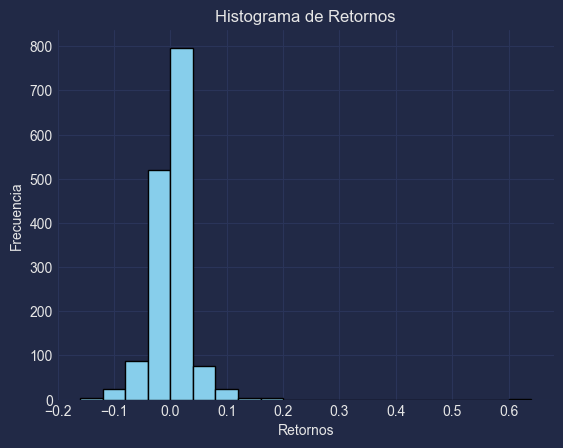

In [347]:
btc_box = btc_box.loc['2020-01-01':]

import matplotlib.pyplot as plt

# Eliminar filas con valores nulos en la columna 'retornos'
btc_box_clean = btc_box.dropna(subset=['retornos'])

# Crear el histograma
plt.hist(btc_box_clean['retornos'], bins=20, color='skyblue', edgecolor='black')

# Configurar etiquetas y título
plt.xlabel('Retornos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Retornos')

# Mostrar el histograma
plt.show()

In [348]:
# Reduccion a la mitad del valor minado. POW

# halving 1º = 2012 nov

# halving 2º = 2016 julio

# halving 3º = 2020 mayo

# halving 4º = 2024 abril

# Precio del btc ese mes, precio del btc 3 meses despues, precrio del btc 1 año despues
